In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
movieDf = pd.read_csv('movies.csv')
movieDf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
ratingsDf = pd.read_csv('ratings.csv')
ratingsDf.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [3]:
tagsDf = pd.read_csv('tags.csv')
tagsDf.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [4]:
# Merging dataframes movies and ratings
dfMerged = pd.merge(movieDf, ratingsDf, how='inner', on='movieId');
dfMerged.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [5]:
#Merging with tags
finalMergedDf = pd.merge(dfMerged, tagsDf, how='left', on=['movieId', 'userId']);
finalMergedDf.head()

,movieId,title,genres,userId,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,NaN


In [6]:
# Applying label encoding on column title of movies dataset
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()
finalMergedDf["title"] = obj.fit_transform(finalMergedDf["title"].astype('str'))
finalMergedDf.head()

,movieId,title,genres,userId,rating,tag
0,1,8871,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,NaN
1,1,8871,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,NaN
2,1,8871,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,NaN
3,1,8871,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,NaN
4,1,8871,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,NaN


In [7]:
print(len(finalMergedDf['tag']))

102677


In [8]:
# Trying to separate multiple genres
#!/usr/bin/python
tempArray=[]
uniqueArray = set()
for index in range(0,102677):
    temp = finalMergedDf["genres"].iloc[index]
    tempArray = temp.split("|")
    for innerIndex in range(0,len(tempArray)):
        uniqueArray.add(tempArray[innerIndex])

uniqueArray = list(uniqueArray)
print(uniqueArray)

['War', 'Romance', 'Children', 'Action', 'Musical', 'Fantasy', 'IMAX', 'Comedy', 'Western', 'Drama', 'Animation', 'Mystery', 'Documentary', 'Thriller', '(no genres listed)', 'Sci-Fi', 'Adventure', 'Crime', 'Film-Noir', 'Horror']


In [9]:
print(len(uniqueArray))

20


In [10]:
# Adding 20 columns for each unique value of genres

for stringIndex in uniqueArray :
    finalMergedDf[stringIndex] = 0
    
finalMergedDf.head()

,movieId,title,genres,userId,rating,tag,War,Romance,Children,Action,...,Animation,Mystery,Documentary,Thriller,(no genres listed),Sci-Fi,Adventure,Crime,Film-Noir,Horror
0,1,8871,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8871,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8871,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,8871,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8871,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Adding 1 in the columns of genres

tempArray=[]
for index in range(0,102677):
    temp = finalMergedDf["genres"].iloc[index]
    tempArray = temp.split("|")
    for innerIndex in range(0,len(tempArray)):
        for columnIndex in range(6,26):
           if tempArray[innerIndex] ==  finalMergedDf.columns.values[columnIndex]:
             finalMergedDf.iloc[index,columnIndex] = 1
            

finalMergedDf.head()

,movieId,title,genres,userId,rating,tag,War,Romance,Children,Action,...,Animation,Mystery,Documentary,Thriller,(no genres listed),Sci-Fi,Adventure,Crime,Film-Noir,Horror
0,1,8871,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,NaN,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,8871,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,NaN,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,1,8871,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,NaN,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1,8871,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,NaN,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,1,8871,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,NaN,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [12]:
# dropping genres

finalMergedDf = finalMergedDf.drop('genres', 1)
finalMergedDf.head()

,movieId,title,userId,rating,tag,War,Romance,Children,Action,Musical,...,Animation,Mystery,Documentary,Thriller,(no genres listed),Sci-Fi,Adventure,Crime,Film-Noir,Horror
0,1,8871,1,4.0,NaN,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,8871,5,4.0,NaN,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,8871,7,4.5,NaN,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,8871,15,2.5,NaN,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,8871,17,4.5,NaN,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [13]:
# Applying label encoding for tags

finalMergedDf["tag"] = obj.fit_transform(finalMergedDf["tag"].astype('str'))
finalMergedDf.head()

,movieId,title,userId,rating,tag,War,Romance,Children,Action,Musical,...,Animation,Mystery,Documentary,Thriller,(no genres listed),Sci-Fi,Adventure,Crime,Film-Noir,Horror
0,1,8871,1,4.0,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,8871,5,4.0,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,8871,7,4.5,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,8871,15,2.5,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,8871,17,4.5,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [14]:
#Taking mean of rating for each movie
rating = []
rating = finalMergedDf.groupby('movieId')['rating'].mean()
rating.head()

movieId
1    3.920930
2    3.441964
3    3.245283
4    2.357143
5    3.040000
Name: rating, dtype: float64

In [15]:
finalMergedDf.head()

,movieId,title,userId,rating,tag,War,Romance,Children,Action,Musical,...,Animation,Mystery,Documentary,Thriller,(no genres listed),Sci-Fi,Adventure,Crime,Film-Noir,Horror
0,1,8871,1,4.0,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,8871,5,4.0,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,8871,7,4.5,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,8871,15,2.5,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,8871,17,4.5,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [16]:
#Replacing rating mean for each movie id
for index in range(0,9742):
    temp = finalMergedDf["movieId"].iloc[index]
    finalMergedDf["rating"].iloc[index] =  rating[temp]
finalMergedDf.head()

C:\Users\Dhwani\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,movieId,title,userId,rating,tag,War,Romance,Children,Action,Musical,...,Animation,Mystery,Documentary,Thriller,(no genres listed),Sci-Fi,Adventure,Crime,Film-Noir,Horror
0,1,8871,1,3.92093,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,8871,5,3.92093,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,8871,7,3.92093,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,8871,15,3.92093,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,8871,17,3.92093,1151,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [17]:
finalMergedDf.to_excel('TransformedMovieDataSet.xlsx', sheet_name='Sheet1');

In [18]:
#Taking 1000 samples of data
sampleDf = finalMergedDf.sample(1000)
print(len(sampleDf))

1000


In [25]:
#iterating 10 times to find the kmeans for each centroid
wcss=[]
for i in range (1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

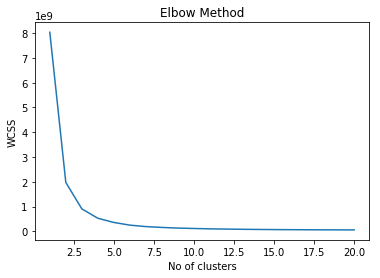

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1,21),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
# k-mean algorith on sampleDf

from sklearn.cluster import KMeans
X = sampleDf.drop(columns=["movieId"])
y = sampleDf["movieId"]
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[3 1 2 2 2 2 2 2 2 0 3 2 3 2 0 0 0 1 3 2 0 3 0 3 1 2 2 3 2 0 1 0 0 3 3 1 0
 3 3 2 1 1 3 1 3 3 3 1 2 0 0 1 3 1 1 3 1 0 2 1 2 1 3 2 0 0 0 1 3 1 1 1 2 1
 0 1 0 0 3 0 3 2 3 1 1 0 1 2 3 3 1 0 3 0 3 3 0 3 1 2 3 1 1 2 0 2 2 0 1 2 2
 1 0 2 3 3 3 3 3 1 0 3 1 3 1 3 3 2 1 3 1 1 2 2 1 3 2 0 2 2 3 3 0 2 2 0 1 0
 2 2 0 0 2 0 1 1 2 2 3 0 0 0 2 3 0 0 1 2 0 2 3 3 0 3 0 2 0 1 3 1 3 1 2 2 1
 1 1 0 3 0 0 3 2 3 2 0 0 2 3 2 2 0 1 2 2 2 0 3 1 1 0 0 0 2 0 3 1 2 0 0 3 1
 3 0 0 3 3 2 1 2 0 2 2 2 3 2 2 0 3 2 1 1 3 3 3 0 0 2 1 1 1 3 2 2 3 2 0 2 0
 0 0 3 2 1 3 2 1 2 3 0 3 1 1 3 1 1 0 0 3 1 0 0 0 1 1 0 2 3 2 3 2 0 1 1 1 0
 0 3 3 0 3 3 2 0 3 3 2 0 2 3 0 0 2 2 0 3 1 0 1 3 0 2 1 2 0 0 2 1 0 0 1 3 1
 3 1 3 1 0 0 1 0 2 1 1 2 3 0 2 3 0 0 0 1 0 1 0 0 1 2 3 3 2 2 1 0 1 2 0 3 1
 3 3 3 1 0 0 1 3 1 0 1 0 0 1 0 2 2 1 3 3 0 2 1 0 2 3 1 2 0 0 0 3 2 3 1 1 1
 2 1 1 3 3 1 0 0 2 0 3 0 1 0 3 2 1 0 3 2 0 3 0 3 1 2 0 0 0 0 3 3 0 1 3 1 0
 1 3 0 0 3 0 2 0 0 2 3 2 1 1 2 2 2 3 2 2 2 1 3 0 3 3 0 3 0 0 1 0 0 2 2 2 0
 3 1 1 1 3 1 3 2 3 2 0 0 

Text(0,0.5,'Tags')

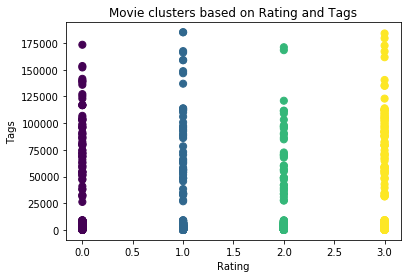

In [34]:
centers = kmeans.cluster_centers_
plt.scatter(y_kmeans,sampleDf['movieId'], c=y_kmeans, s=50, cmap='viridis')
plt.title('Movie clusters based on Rating and Tags')
plt.xlabel('Rating')
plt.ylabel('Tags')

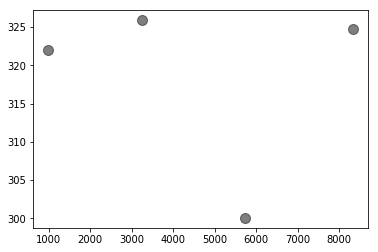

In [21]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);